# Moving Average (MA) Models

This lesson introduces Moving Average (MA) models. An MA(q) model uses the past q forecast errors to model the current value.

## Understanding MA Models

MA models are useful when the error terms (shocks) are correlated over time.

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  150
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -202.911
Date:                Fri, 28 Mar 2025   AIC                            411.822
Time:                        01:06:17   BIC                            420.854
Sample:                    01-01-2020   HQIC                           415.492
                         - 05-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0829      0.070     -1.183      0.237      -0.220       0.054
ma.L1         -0.0878      0.092     -0.959      0.338      -0.267       0.092
sigma2         0.8759      0.105      8.334      0.0

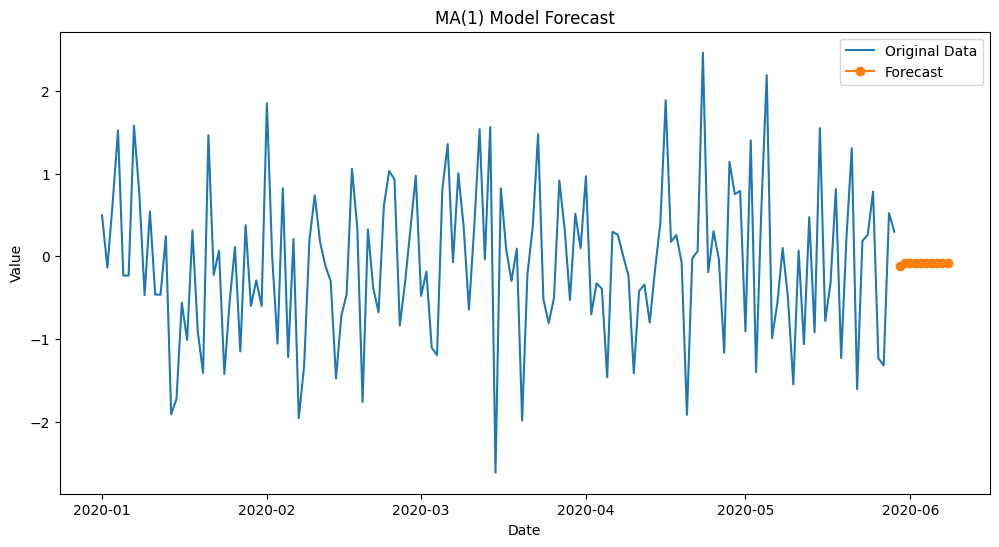

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

# Generate synthetic white noise data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=150, freq='D')
data = np.random.normal(0, 1, 150)
ts_df = pd.DataFrame({'Date': dates, 'Value': data}).set_index('Date').asfreq('D')

# Fit an MA(1) model (using ARIMA with order (0,0,1))
model = ARIMA(ts_df['Value'], order=(0, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 10 steps
forecast = model_fit.forecast(steps=10)
print('\nForecast:')
print(forecast)

# Plot the original data and forecast
plt.figure(figsize=(12,6))
plt.plot(ts_df, label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('MA(1) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Conclusion

We fitted a Moving Average model to our data and generated forecasts based on the model.